In [7]:
import pickle
import ujson
import os
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from rouge import Rouge
from pathlib import Path

In [8]:
run_dir = Path('run') / sorted(os.listdir('run'))[-1]

### Plot losses

In [9]:
history = pickle.load(open(run_dir / 'history.pickle', 'rb'))

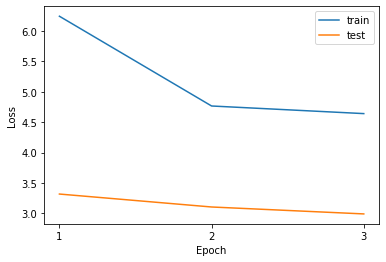

In [16]:
epochs = range(1, len(history['loss']) + 1)
plt.plot(epochs, history['loss'], label='train') 
plt.plot(epochs, history['val_loss'], label='test')
plt.xticks(epochs)
plt.legend()
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.savefig(run_dir / 'loss_history.png')

### Compute ROUGE

In [11]:
data = pd.read_csv(open(run_dir / 'outputs.csv'))

In [12]:
print(data.shape)
data.dropna(inplace=True)
print(data.shape)

(100, 3)
(98, 3)


In [13]:
# should always use title, not alternative to have consistent results
titles = list(data['title'])
predicted_titles = list(data['predicted_title'])

In [14]:
rouge = Rouge()
scores = rouge.get_scores(titles, predicted_titles, avg=True)

In [15]:
ujson.dump(scores, open(run_dir / 'rouge_metrics.json', 'w'))